In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\Coordcontrol3_P2_7_18_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\video_time\control3_P2_7_18_24_video_time0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\stimulus_time\control3_P2_7_18_24_stimulus_time0.csv'

north_pixel = 96
south_pixel = 414
east_pixel = 487
west_pixel = 145
shelter_x_pixel = 171
shelter_y_pixel = 245

#estimate for when mouse reaches shelter
escape_done = 4.48 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
sigma = 2

In [5]:
#read in DLC data, convert to cm, center platform at 0,0
#return converted coordinates for all 
shelter_x, shelter_y, x_diam, y_diam, coords = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [6]:
#replace any head, nose, or center points with likelihood < .9 with NA
#coords dataframe is filled with NA when LT<.9, coords_scaled has interpolated data (compare in graphs)
coord_scaled = filter_data(.9, coords)

In [7]:
#add time in seconds for both coords (na values) and coord_scaled (interpolated)
#results in given dataframe with time in seconds zeroed at stimulus onset. choose which stimulus to look at
convert_time(time_path, coord_scaled, audio_path, 1)
convert_time(time_path, coords, audio_path, 1)

In [8]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)
displacement(shelter_x, shelter_y, coords)

In [9]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
#return total distance for linearity calculations
total_distance = speed(coord_scaled)
total_distance_coords = speed(coords)

In [10]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)
angle(shelter_x, shelter_y, coords)


In [11]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)
angle_speed(coords)

In [12]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
time_range = dataframe_ranges(-4, 8, coord_scaled)
time_range_coords = dataframe_ranges(-7, 8, coords)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

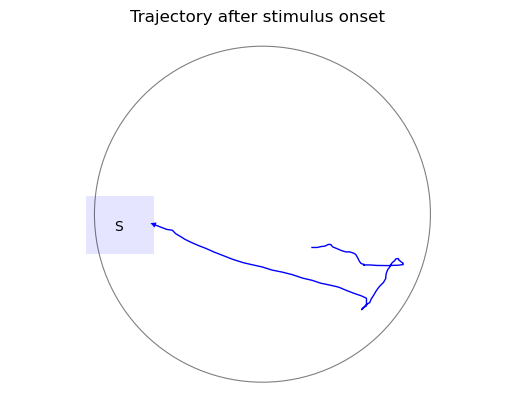

In [13]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, dataframe_ranges(0, escape_done, coord_scaled))

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

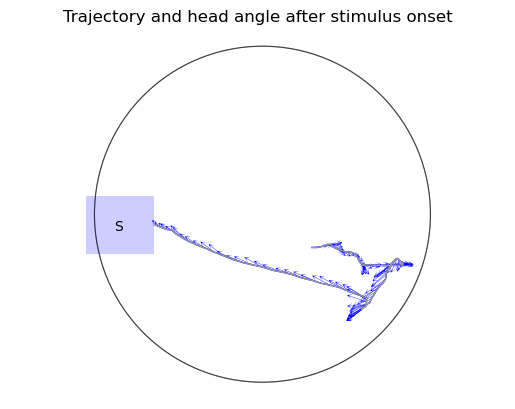

In [14]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, dataframe_ranges(0, escape_done, coord_scaled))

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

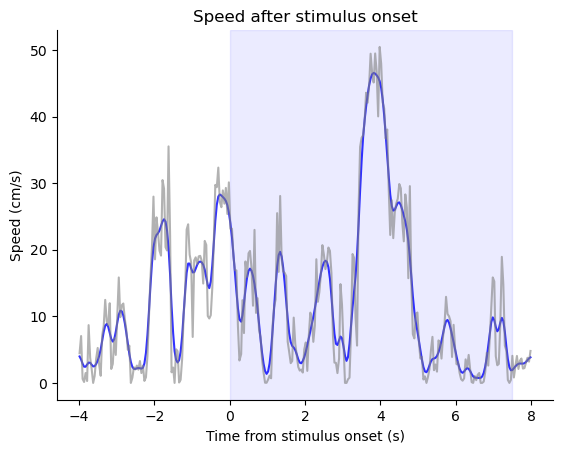

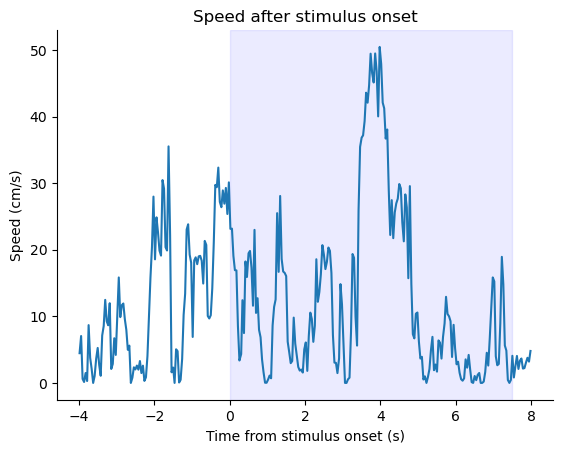

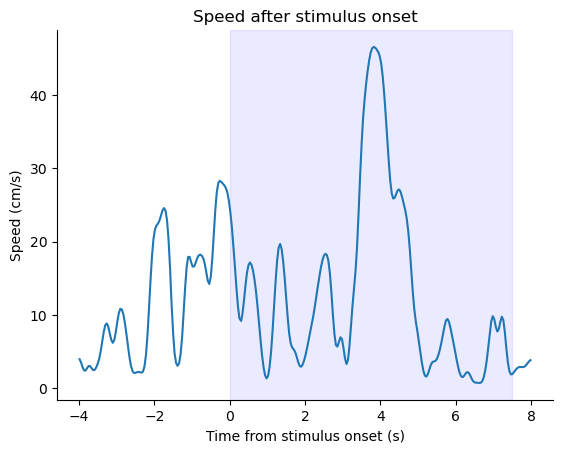

In [15]:
speed_figure(-4, 8, coord_scaled, False, True, sigma)
speed_figure(-4, 8, coord_scaled, False, False, sigma)
speed_figure(-4, 8, coord_scaled, True, False, sigma)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

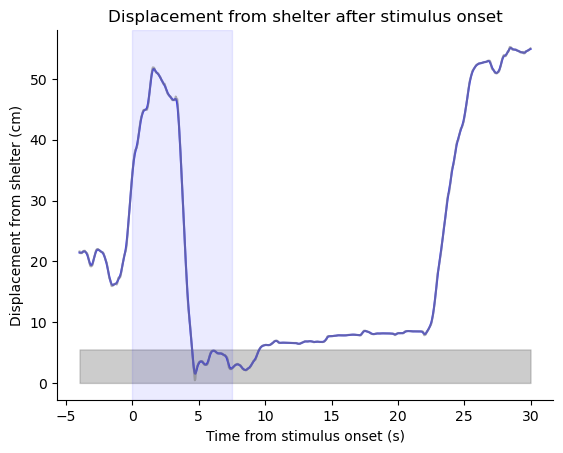

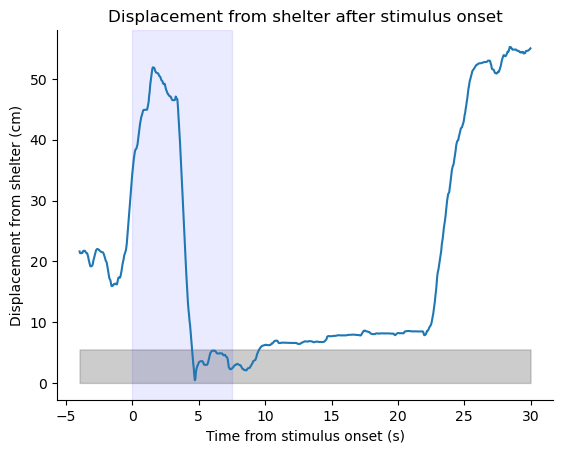

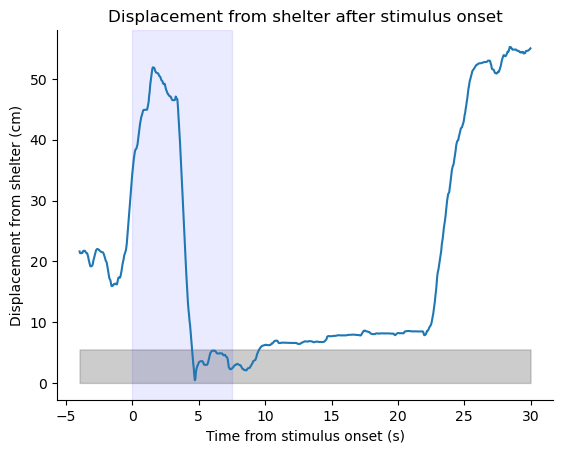

In [16]:
displacement_figure(-4, 30,coord_scaled, False, True, sigma)
displacement_figure(-4, 30, coord_scaled, False, False, sigma)
displacement_figure(-4, 30,coord_scaled, False, False, sigma)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

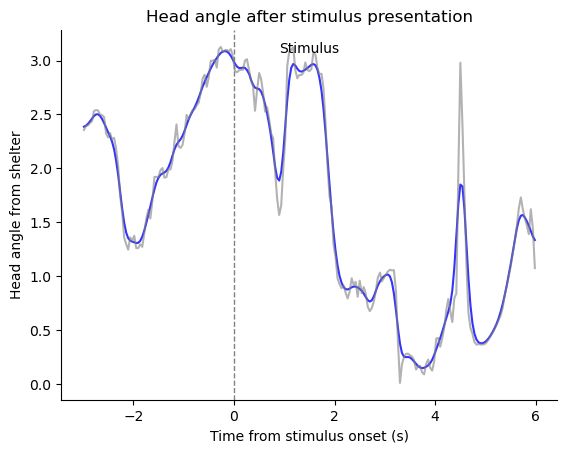

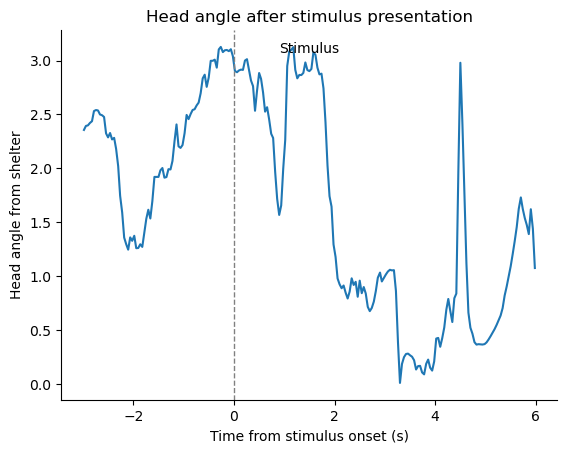

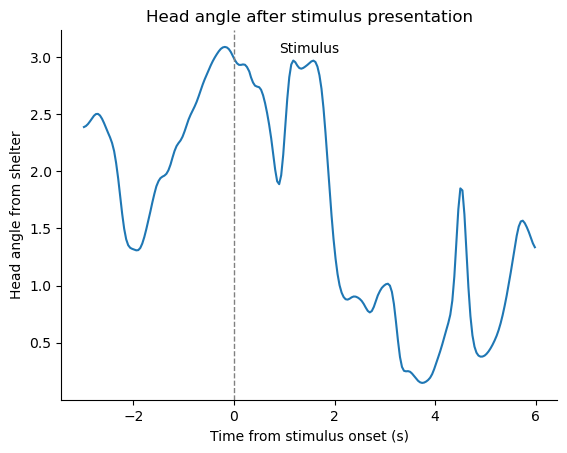

In [17]:
head_angle_figure(-3, 6,coord_scaled, False, True, sigma)
head_angle_figure(-3, 6,coord_scaled, False, False, sigma)
head_angle_figure(-3, 6,coord_scaled, True, True, sigma)


In [18]:
ratio, initial_displacement, total_distance = linearity_ratio(0, escape_done, coord_scaled)

In [19]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coords)

In [20]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
8684,8684,8684,NaN,NaN,0.874888,19.608060,-11.116967,0.999987,20.333203,-10.877351,...,0.999960,15.667068,-6.566904,0.999995,0.778432,44.580751,7.982802,0.308376,NaN,NaN
8685,8685,8685,NaN,NaN,0.712624,19.608060,-11.308296,0.999988,20.333203,-11.254153,...,0.999940,16.051652,-6.618448,0.999992,0.818995,44.859122,6.863411,0.278401,NaN,NaN
8686,8686,8686,NaN,NaN,0.858669,19.608060,-11.499942,0.999978,20.372938,-11.508111,...,0.999924,16.210637,-6.635536,0.999986,0.858483,44.907076,3.525641,0.139221,NaN,NaN
8689,8689,8689,NaN,NaN,0.882084,19.807472,-11.571759,0.999992,20.600518,-11.413744,...,0.999942,16.155617,-6.661136,0.999991,0.978918,44.923000,0.026680,0.001072,NaN,NaN
8711,8711,8711,NaN,NaN,0.748892,26.638245,-9.200598,0.999930,27.111302,-8.849625,...,0.999901,22.003109,-6.785050,0.999985,1.859200,50.966972,1.847245,0.074411,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,8837,8837,NaN,NaN,0.037344,-32.089407,0.742077,0.999984,-32.043390,-0.121576,...,0.999999,-26.088321,1.844537,0.999993,6.900685,4.570333,6.769547,0.275548,NaN,NaN
8838,8838,8838,NaN,NaN,0.028871,-31.610020,0.675991,0.999987,-31.111633,-0.121576,...,0.999992,-25.903060,2.625554,0.999994,6.940006,4.604556,11.428137,0.449366,NaN,NaN
8839,8839,8839,NaN,NaN,0.158225,-30.989735,0.524735,0.999995,-30.442955,-0.075230,...,0.999999,-25.746323,3.259947,0.999997,6.979994,4.607956,15.844480,0.633589,NaN,NaN
8840,8840,8840,NaN,NaN,0.693297,-30.289351,0.505212,0.999991,-29.513021,-0.075230,...,0.999995,-25.405124,3.612715,0.999997,7.020531,4.402688,15.237319,0.617675,NaN,NaN


In [21]:
rotate, shelter_rotate_x, shelter_rotate_y = align_shelter(shelter_x, shelter_y, 0, escape_done, coord_scaled)


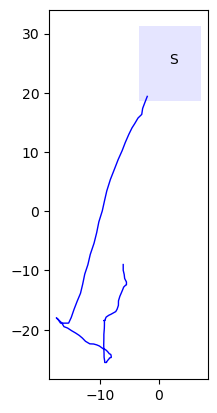

In [22]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


In [23]:
coord_scaled_smooth = smooth_curve(sigma, coord_scaled)